In [1]:
%load_ext lab_black

In [2]:
import pandas as pd
import CococoNet_reader
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

In [3]:
orthology_map = pd.read_csv(
    "/data/passala/Collaborator_Data/Bruno_Ken_Collab/Sorghum_Maize_orthologous_alignment.csv"
)
orthology_map

,Sorghum,Maize_genome_V4,M1_or_M2,Duplicates_?
0,SORBI_3006G274500,Zm00001d001763,M1,1
1,SORBI_3006G274600,Zm00001d001765,M1,1
2,SORBI_3006G274933,Zm00001d001769,M1,1
3,SORBI_3006G274200,Zm00001d001771,M1,1
4,SORBI_3006G273600,Zm00001d001776,M1,1
...,...,...,...,...
14900,SORBI_3K004900,Zm00001d014292,M2,1
14901,SORBI_3K005200,Zm00001d014306,M2,1
14902,SORBI_3K005900,Zm00001d014318,M2,1
14903,SORBI_3K007000,Zm00001d014285,M2,1


In [4]:
sorg_triplets_coconet_format = pd.read_csv(
    "/home/passala/Gene_duplication_project/Code/Whole_genome_comparison_code/Generated_tables_minor_use/sorg_triplets_cococonet_format.csv"
)
sorg_triplets_coconet_format.drop(columns=["Unnamed: 0", "LocusTag"], inplace=True)
sorg_triplets_coconet_format.rename(columns={"GeneSymbol": "Sorghum"}, inplace=True)
sorg_triplets_coconet_format

,M1,M2,Sorghum
0,Zm00001d001766,Zm00001d026665,LOC8055450
1,Zm00001d001772,Zm00001d026662,LOC8076499
2,Zm00001d001774,Zm00001d026657,LOC8076496
3,Zm00001d001780,Zm00001d026653,LOC8076490
4,Zm00001d001784,Zm00001d026652,LOC110436087
...,...,...,...
5047,Zm00001d053173,Zm00001d004856,LOC8083087
5048,Zm00001d053177,Zm00001d004855,LOC8083089
5049,Zm00001d053178,Zm00001d004851,LOC8070669
5050,Zm00001d053181,Zm00001d004848,LOC8070671


In [5]:
triplets_m1_pairs = sorg_triplets_coconet_format[["M1", "Sorghum"]]
triplets_m1_pairs.rename(columns={"M1": "Maize_genome_V4"}, inplace=True)
triplets_m1_pairs["Duplicate Location"] = "M1"
triplets_m1_pairs["M1_or_M2"] = "M1 Triplet"

/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/pandas/core/frame.py:4438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [6]:
triplets_m2_pairs = sorg_triplets_coconet_format[["M2", "Sorghum"]]
triplets_m2_pairs.rename(columns={"M2": "Maize_genome_V4"}, inplace=True)
triplets_m2_pairs["Duplicate Location"] = "M2"
triplets_m2_pairs["M1_or_M2"] = "M2 Triplet"
triplets_m2_pairs

,Maize_genome_V4,Sorghum,Duplicate Location,M1_or_M2
0,Zm00001d026665,LOC8055450,M2,M2 Triplet
1,Zm00001d026662,LOC8076499,M2,M2 Triplet
2,Zm00001d026657,LOC8076496,M2,M2 Triplet
3,Zm00001d026653,LOC8076490,M2,M2 Triplet
4,Zm00001d026652,LOC110436087,M2,M2 Triplet
...,...,...,...,...
5047,Zm00001d004856,LOC8083087,M2,M2 Triplet
5048,Zm00001d004855,LOC8083089,M2,M2 Triplet
5049,Zm00001d004851,LOC8070669,M2,M2 Triplet
5050,Zm00001d004848,LOC8070671,M2,M2 Triplet


In [7]:
sorghum_cococonet = CococoNet_reader.read_cococonet("sorghum")
maize_coconet = CococoNet_reader.read_cococonet("maize")
sorghum_cococonet

,LOC8059226,LOC8059546,LOC8059547,LOC8059227,LOC8059229,LOC8061368,LOC8059230,LOC110431639,LOC8059231,LOC110431007,...,LOC8155620,LOC8155690,LOC8155474,LOC8155627,LOC110431570,LOC110431578,LOC8155598,SobioMr01,SobioMr02,SobiCt005
LOC8059226,1.000000,0.920070,0.986324,0.786967,0.571604,0.560589,0.993414,0.983911,0.997859,0.964415,...,0.482024,0.792105,0.586484,0.742133,0.660669,0.711147,0.948436,0.434571,0.295380,0.025249
LOC8059546,0.920070,1.000000,0.809578,0.449596,0.309818,0.287711,0.951564,0.704641,0.896534,0.798333,...,0.577304,0.283477,0.607476,0.638621,0.412651,0.510903,0.866277,0.265633,0.308682,0.011385
LOC8059547,0.986324,0.809578,1.000000,0.685092,0.379819,0.707909,0.915436,0.861262,0.941264,0.797994,...,0.461730,0.681397,0.457861,0.647397,0.488640,0.665856,0.811203,0.165546,0.153756,0.034361
LOC8059227,0.786967,0.449596,0.685092,1.000000,0.208669,0.988340,0.611979,0.816137,0.943484,0.787340,...,0.379262,0.243562,0.205258,0.963053,0.165812,0.287659,0.703609,0.122150,0.043288,0.591362
LOC8059229,0.571604,0.309818,0.379819,0.208669,1.000000,0.374361,0.475520,0.412014,0.526618,0.220135,...,0.047687,0.244181,0.368760,0.328061,0.104109,0.664326,0.384834,0.208459,0.173316,0.034023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LOC110431578,0.711147,0.510903,0.665856,0.287659,0.664326,0.486422,0.519430,0.484699,0.643658,0.580541,...,0.323369,0.559971,0.466463,0.550205,0.441845,1.000000,0.610149,0.224661,0.228275,0.116048
LOC8155598,0.948436,0.866277,0.811203,0.703609,0.384834,0.393429,0.944314,0.939128,0.974814,0.912822,...,0.186591,0.569730,0.544790,0.691114,0.689587,0.610149,1.000000,0.254893,0.137792,0.004747
SobioMr01,0.434571,0.265633,0.165546,0.122150,0.208459,0.091874,0.350054,0.223220,0.360809,0.353667,...,0.151707,0.237235,0.099368,0.162201,0.146040,0.224661,0.254893,1.000000,0.999856,0.344712
SobioMr02,0.295380,0.308682,0.153756,0.043288,0.173316,0.046273,0.311431,0.149528,0.237930,0.224317,...,0.167228,0.171645,0.070001,0.085180,0.081969,0.228275,0.137792,0.999856,1.000000,0.196830


In [8]:
brome_coco = CococoNet_reader.read_cococonet("brome")
brome_coco

,LOC100827520,LOC100826906,LOC100844744,LOC100828734,LOC100830560,LOC104581527,LOC100833245,LOC100835774,LOC100834691,LOC100842425,...,LOC100821073,LOC100821676,LOC100822302,LOC100839962,LOC100821994,LOC100822611,LOC100821372,LOC100822924,LOC100823846,LOC100824153
LOC100827520,1.000000,0.419046,0.511765,0.802579,0.417409,0.503818,0.392252,0.254887,0.553965,0.521359,...,0.312981,0.686347,0.203353,0.270139,0.260446,0.564303,0.717878,0.593280,0.670711,0.691665
LOC100826906,0.419046,1.000000,0.516390,0.279700,0.085631,0.205460,0.259303,0.190160,0.453433,0.332833,...,0.612036,0.694506,0.252161,0.579813,0.743061,0.474996,0.325158,0.621616,0.350421,0.293506
LOC100844744,0.511765,0.516390,1.000000,0.214115,0.145756,0.338345,0.301429,0.300445,0.401864,0.399296,...,0.164140,0.517937,0.109769,0.238590,0.360309,0.558722,0.326934,0.432239,0.404201,0.211222
LOC100828734,0.802579,0.279700,0.214115,1.000000,0.875937,0.579784,0.578595,0.355379,0.553221,0.681856,...,0.331848,0.781017,0.346754,0.370153,0.243450,0.396456,0.880164,0.449586,0.900139,0.880163
LOC100830560,0.417409,0.085631,0.145756,0.875937,1.000000,0.621255,0.437872,0.209503,0.385089,0.687595,...,0.663363,0.709678,0.463864,0.421013,0.490238,0.439583,0.799019,0.297097,0.897196,0.810025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LOC100822611,0.564303,0.474996,0.558722,0.396456,0.439583,0.339379,0.095846,0.158774,0.441776,0.881456,...,0.804564,0.668447,0.250939,0.921009,0.949530,1.000000,0.730035,0.927398,0.793096,0.345543
LOC100821372,0.717878,0.325158,0.326934,0.880164,0.799019,0.702566,0.682325,0.462678,0.485823,0.868774,...,0.587183,0.853357,0.308147,0.669087,0.797655,0.730035,1.000000,0.920666,0.972052,0.773481
LOC100822924,0.593280,0.621616,0.432239,0.449586,0.297097,0.536941,0.193149,0.146843,0.371496,0.994631,...,0.848571,0.535743,0.179053,0.742842,0.978935,0.927398,0.920666,1.000000,0.887354,0.517284
LOC100823846,0.670711,0.350421,0.404201,0.900139,0.897196,0.734065,0.500650,0.231630,0.466046,0.972013,...,0.803738,0.878127,0.228929,0.886074,0.915620,0.793096,0.972052,0.887354,1.000000,0.915433


In [9]:
# np.fill_diagonal(maize_coconet.values,.5)
# np.fill_diagonal(sorghum_cococonet.values,.5)

In [10]:
maize_coconet_ranked = maize_coconet.rank()
sorg_coconet_ranked = sorghum_cococonet.rank()

In [11]:
maize_coconet_ranked.sort_values(by="Zm00001d027231")

,Zm00001d027231,Zm00001d027232,Zm00001d027233,Zm00001d027236,Zm00001d027239,Zm00001d027240,Zm00001d027242,Zm00001d027248,Zm00001d027253,Zm00001d027254,...,ENSRNA049478584,ENSRNA049478607,ENSRNA049478600,Zm00001d000447,Zm00001d000452,ENSRNA049479090,ENSRNA049478822,ENSRNA049478534,ENSRNA049478530,ENSRNA049478881
Zm00001d007378,1.0,4053.0,3773.0,406.0,671.0,3426.0,3.0,1272.0,833.0,339.0,...,4212.0,8751.0,5746.0,7564.0,6042.0,7285.0,5460.0,7940.0,10966.0,10406.0
Zm00001d007908,2.0,475.0,1269.0,284.0,380.0,3240.0,262.0,537.0,1066.0,534.0,...,405.0,47.0,38.0,2366.0,163.0,12.0,57.0,304.0,62.0,26.0
Zm00001d052220,3.0,1172.0,1820.0,542.0,884.0,216.0,41.0,3929.0,2913.0,1321.0,...,1161.0,1336.0,277.0,10112.0,3639.0,1287.0,385.0,2673.0,1422.0,668.0
Zm00001d030103,4.0,57.0,277.0,1636.0,3840.0,3083.0,1419.0,187.0,1786.0,1504.0,...,2367.0,4431.0,1600.0,14574.0,2224.0,3270.0,5171.0,5448.0,4012.0,6364.0
Zm00001d034986,5.0,3154.0,6324.0,1509.0,2773.0,2149.0,1487.0,2225.0,2970.0,888.0,...,1114.0,2222.0,1316.0,5420.0,7603.0,670.0,2287.0,1203.0,559.0,670.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zm00001d044581,25977.0,20480.0,21463.0,19624.0,15011.0,10674.0,13240.0,24576.0,15497.0,16232.0,...,8592.0,7553.0,16124.0,6053.0,16731.0,13244.0,17395.0,9185.0,15404.0,15068.0
Zm00001d004020,25978.0,19825.0,17630.0,17773.0,14804.0,12307.0,18203.0,23816.0,15724.0,18537.0,...,14384.0,17549.0,18557.0,2609.0,16319.0,16877.0,11868.0,9728.0,16443.0,13390.0
Zm00001d050615,25979.0,22190.0,16210.0,18814.0,16699.0,5922.0,16143.0,24845.0,16425.0,16537.0,...,5337.0,7391.0,8039.0,1627.0,15183.0,13219.0,7664.0,6785.0,7438.0,4720.0
Zm00001d031009,25980.0,22412.0,20805.0,17843.0,19865.0,12504.0,20633.0,22871.0,16416.0,15700.0,...,23034.0,10691.0,20903.0,1155.0,16778.0,22963.0,15771.0,15845.0,20094.0,17848.0


In [12]:
orthology_map_1to1 = orthology_map.loc[orthology_map["Duplicates_?"] == 1]
orthology_map_1to1

,Sorghum,Maize_genome_V4,M1_or_M2,Duplicates_?
0,SORBI_3006G274500,Zm00001d001763,M1,1
1,SORBI_3006G274600,Zm00001d001765,M1,1
2,SORBI_3006G274933,Zm00001d001769,M1,1
3,SORBI_3006G274200,Zm00001d001771,M1,1
4,SORBI_3006G273600,Zm00001d001776,M1,1
...,...,...,...,...
14900,SORBI_3K004900,Zm00001d014292,M2,1
14901,SORBI_3K005200,Zm00001d014306,M2,1
14902,SORBI_3K005900,Zm00001d014318,M2,1
14903,SORBI_3K007000,Zm00001d014285,M2,1


In [13]:
sorghum_gene_name_mapper = pd.read_csv("/data/CoCoCoNet/geneInfo/sorghum_info.csv")
sorghum_gene_name_mapper.rename(columns={"LocusTag": "Sorghum"}, inplace=True)
sorghum_gene_name_mapper.head(5)

,EntrezID,EnsemblID,GeneSymbol,Sorghum,Synonyms,dbXrefs,Chromosome,Type,UniProtID,UniProtID2,OrthoID,NetworkIDs
0,8081570.0,NaN,LOC8081570,SORBI_3001G000100,NaN,|NA|,1,protein-coding,NaN,NaN,NaN,LOC8081570
1,8059226.0,SORBI_3001G000200,LOC8059226,SORBI_3001G000200,NaN,|NA|,1,protein-coding,C5WR13,NaN,4558_0:0004e6,LOC8059226
2,110434520.0,NaN,LOC110434520,NaN,NaN,|NA|,1,ncRNA,NaN,NaN,NaN,LOC110434520
3,8059546.0,NaN,LOC8059546,SORBI_3001G000400,NaN,|NA|,1,protein-coding,NaN,NaN,NaN,LOC8059546
4,8059547.0,NaN,LOC8059547,SORBI_3001G000700,NaN,|NA|,1,protein-coding,NaN,NaN,NaN,LOC8059547


In [14]:
mapper_coconet = orthology_map_1to1.merge(
    on="Sorghum", right=sorghum_gene_name_mapper[["GeneSymbol", "Sorghum"]]
)
mapper_coconet = mapper_coconet.drop(columns=["Duplicates_?", "Sorghum"])
mapper_coconet = mapper_coconet.rename(columns={"GeneSymbol": "Sorghum"})
mapper_coconet

,Maize_genome_V4,M1_or_M2,Sorghum
0,Zm00001d001763,M1,LOC8055448
1,Zm00001d001765,M1,LOC8055449
2,Zm00001d001769,M1,LOC8076501
3,Zm00001d001771,M1,LOC8055446
4,Zm00001d001776,M1,LOC8076494
...,...,...,...
12119,Zm00001d036829,M2,LOC8065089
12120,Zm00001d036701,M2,LOC8069366
12121,Zm00001d036655,M2,LOC8069386
12122,Zm00001d036520,M2,LOC8065124


In [15]:
mapper_coconet = pd.concat(
    [mapper_coconet, triplets_m1_pairs, triplets_m2_pairs], ignore_index=True
)
mapper_coconet

,Maize_genome_V4,M1_or_M2,Sorghum,Duplicate Location
0,Zm00001d001763,M1,LOC8055448,NaN
1,Zm00001d001765,M1,LOC8055449,NaN
2,Zm00001d001769,M1,LOC8076501,NaN
3,Zm00001d001771,M1,LOC8055446,NaN
4,Zm00001d001776,M1,LOC8076494,NaN
...,...,...,...,...
22223,Zm00001d004856,M2 Triplet,LOC8083087,M2
22224,Zm00001d004855,M2 Triplet,LOC8083089,M2
22225,Zm00001d004851,M2 Triplet,LOC8070669,M2
22226,Zm00001d004848,M2 Triplet,LOC8070671,M2


In [16]:
mapper_coconet = mapper_coconet[
    mapper_coconet["Maize_genome_V4"].isin(maize_coconet.index)
]
mapper_coconet = mapper_coconet[mapper_coconet["Sorghum"].isin(sorghum_cococonet.index)]
mapper_coconet

,Maize_genome_V4,M1_or_M2,Sorghum,Duplicate Location
0,Zm00001d001763,M1,LOC8055448,NaN
1,Zm00001d001765,M1,LOC8055449,NaN
3,Zm00001d001771,M1,LOC8055446,NaN
6,Zm00001d001786,M1,LOC8076487,NaN
7,Zm00001d001789,M1,LOC8085888,NaN
...,...,...,...,...
22222,Zm00001d004857,M2 Triplet,LOC8070663,M2
22223,Zm00001d004856,M2 Triplet,LOC8083087,M2
22224,Zm00001d004855,M2 Triplet,LOC8083089,M2
22225,Zm00001d004851,M2 Triplet,LOC8070669,M2


In [17]:
coconet_of_results = mapper_coconet[
    ["Sorghum", "Maize_genome_V4", "M1_or_M2", "Duplicate Location"]
]
coconet_of_results["Sorghum_Score_M1"] = np.nan
coconet_of_results["Sorghum_Score_M2"] = np.nan
coconet_of_results["Maize_Score_M1"] = np.nan
coconet_of_results["Maize_Score_M2"] = np.nan

/tmp/ipykernel_2091521/221473535.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coconet_of_results["Sorghum_Score_M1"] = np.nan
/tmp/ipykernel_2091521/221473535.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coconet_of_results["Sorghum_Score_M2"] = np.nan
/tmp/ipykernel_2091521/221473535.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [18]:
coconet_of_results

,Sorghum,Maize_genome_V4,M1_or_M2,Duplicate Location,Sorghum_Score_M1,Sorghum_Score_M2,Maize_Score_M1,Maize_Score_M2
0,LOC8055448,Zm00001d001763,M1,NaN,NaN,NaN,NaN,NaN
1,LOC8055449,Zm00001d001765,M1,NaN,NaN,NaN,NaN,NaN
3,LOC8055446,Zm00001d001771,M1,NaN,NaN,NaN,NaN,NaN
6,LOC8076487,Zm00001d001786,M1,NaN,NaN,NaN,NaN,NaN
7,LOC8085888,Zm00001d001789,M1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
22222,LOC8070663,Zm00001d004857,M2 Triplet,M2,NaN,NaN,NaN,NaN
22223,LOC8083087,Zm00001d004856,M2 Triplet,M2,NaN,NaN,NaN,NaN
22224,LOC8083089,Zm00001d004855,M2 Triplet,M2,NaN,NaN,NaN,NaN
22225,LOC8070669,Zm00001d004851,M2 Triplet,M2,NaN,NaN,NaN,NaN


In [19]:
# dictionary_mapper_sorg_to_maize = mapper_coconet.set_index("Sorghum").to_dict()[
#     "Maize_genome_V4"
# ]

In [20]:
dictionary_mapper_sorg_to_maize_with_m1_triplet_mapping = (
    mapper_coconet.loc[mapper_coconet["Duplicate Location"].isin([np.nan, "M1"])]
    .set_index("Sorghum")
    .to_dict()["Maize_genome_V4"]
)
dictionary_mapper_sorg_to_maize_with_m2_triplet_mapping = (
    mapper_coconet.loc[mapper_coconet["Duplicate Location"].isin([np.nan, "M2"])]
    .set_index("Sorghum")
    .to_dict()["Maize_genome_V4"]
)

In [21]:
trimmed_sorg_cococnet = sorghum_cococonet[
    sorghum_cococonet.columns.intersection(mapper_coconet["Sorghum"].to_list())
]
trimmed_sorg_cococnet = trimmed_sorg_cococnet[
    trimmed_sorg_cococnet.index.isin(mapper_coconet["Sorghum"].to_list())
]
trimmed_sorg_cococnet

,LOC8059226,LOC8059546,LOC8059547,LOC8059227,LOC8059229,LOC8061368,LOC8059230,LOC110431639,LOC110431931,LOC8059237,...,LOC8069245,LOC8066396,LOC8069246,LOC8069247,LOC8069249,LOC8066397,LOC8066399,LOC8066401,LOC8069250,LOC8066402
LOC8059226,1.000000,0.920070,0.986324,0.786967,0.571604,0.560589,0.993414,0.983911,0.970214,0.395896,...,0.925023,0.942297,0.917533,0.986269,0.969158,0.802981,0.990284,0.998195,0.979112,0.990614
LOC8059546,0.920070,1.000000,0.809578,0.449596,0.309818,0.287711,0.951564,0.704641,0.671070,0.520516,...,0.634161,0.376549,0.767551,0.872182,0.848376,0.423276,0.908377,0.900073,0.825631,0.914651
LOC8059547,0.986324,0.809578,1.000000,0.685092,0.379819,0.707909,0.915436,0.861262,0.909944,0.375835,...,0.830202,0.802555,0.764822,0.872930,0.833087,0.743626,0.880349,0.945644,0.905916,0.799210
LOC8059227,0.786967,0.449596,0.685092,1.000000,0.208669,0.988340,0.611979,0.816137,0.735235,0.185983,...,0.520273,0.790915,0.822742,0.766656,0.424949,0.998775,0.881526,0.795859,0.601606,0.649543
LOC8059229,0.571604,0.309818,0.379819,0.208669,1.000000,0.374361,0.475520,0.412014,0.538037,0.053253,...,0.767962,0.189984,0.468102,0.633535,0.654626,0.354420,0.568310,0.591867,0.547456,0.746486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LOC8066397,0.802981,0.423276,0.743626,0.998775,0.354420,0.993599,0.690917,0.800005,0.936052,0.257164,...,0.770764,0.731183,0.820217,0.800330,0.514897,1.000000,0.894581,0.876934,0.786762,0.708317
LOC8066399,0.990284,0.908377,0.880349,0.881526,0.568310,0.772049,0.975242,0.973179,0.946590,0.313257,...,0.923793,0.881301,0.930756,0.995041,0.873098,0.894581,1.000000,0.990395,0.985046,0.998121
LOC8066401,0.998195,0.900073,0.945644,0.795859,0.591867,0.704766,0.972301,0.981839,0.991246,0.366301,...,0.955415,0.915192,0.965649,0.990953,0.934498,0.876934,0.990395,1.000000,0.988400,0.990703
LOC8069250,0.979112,0.825631,0.905916,0.601606,0.547456,0.450515,0.959239,0.925372,0.932974,0.344687,...,0.880579,0.725972,0.954863,0.980007,0.843603,0.786762,0.985046,0.988400,1.000000,0.980182


In [22]:
top_10_sorg_genes = np.array(
    [trimmed_sorg_cococnet[c].nlargest(11).index.values for c in trimmed_sorg_cococnet]
)  # using pair list above, cut down top 10 list to relevant genes, probably by adding list as a column in panda and then filtering panda to index of pair list
top_10_sorg_genes_dataframe = pd.DataFrame(
    data=top_10_sorg_genes,
    index=trimmed_sorg_cococnet.index,
    columns=[
        "Zero",
        "One",
        "Two",
        "Three",
        "Four",
        "Five",
        "Six",
        "Seven",
        "Eight",
        "Nine",
        "Ten",
    ],
)
top_10_sorg_genes_dataframe.drop(columns=["Zero"], inplace=True)
top_10_sorg_genes_dataframe

,One,Two,Three,Four,Five,Six,Seven,Eight,Nine,Ten
LOC8059226,LOC110432856,LOC8075992,LOC8079565,LOC8066472,LOC8077524,LOC110433974,LOC8074440,LOC8063279,LOC8066305,LOC110429704
LOC8059546,LOC8077924,LOC8060148,LOC8085954,LOC8080136,LOC8069371,LOC8081533,LOC8086139,LOC8081191,LOC8063338,LOC8063055
LOC8059547,LOC8060847,LOC8059226,LOC110436140,LOC8057906,LOC8080799,LOC8059711,LOC8059292,LOC110433974,LOC8078292,LOC8081458
LOC8059227,LOC8082317,LOC8056104,LOC8066397,LOC8074400,LOC8058644,LOC8065711,LOC8059137,LOC8072025,LOC110432868,LOC8079048
LOC8059229,LOC8070586,LOC8072486,LOC8064267,LOC8070133,LOC8062236,LOC8062899,LOC8065426,LOC110431630,LOC8084173,LOC8061133
...,...,...,...,...,...,...,...,...,...,...
LOC8066397,LOC8074797,LOC8072435,LOC8074400,LOC110433977,LOC8059227,LOC8059664,LOC8059137,LOC8078135,LOC8077624,LOC8077246
LOC8066399,LOC8073897,LOC8058374,LOC8076091,LOC8056581,LOC8065411,LOC8075727,LOC8080599,LOC8065324,LOC8054159,LOC8073067
LOC8066401,LOC8079116,LOC110432856,LOC8066472,LOC8054193,LOC8066096,LOC8062421,LOC8075692,LOC8060802,LOC8072008,LOC8063686
LOC8069250,LOC8072143,LOC8072302,LOC8080392,LOC110435048,LOC8077524,LOC8084446,LOC8059759,LOC8066472,LOC8058979,LOC8070142


In [23]:
len(top_10_sorg_genes)

13899

In [24]:
top_10_sorg_genes_m1_genes = top_10_sorg_genes_dataframe[
    top_10_sorg_genes_dataframe.index.isin(
        dictionary_mapper_sorg_to_maize_with_m1_triplet_mapping.keys()
    )
]
top_10_sorg_genes_m1_genes

,One,Two,Three,Four,Five,Six,Seven,Eight,Nine,Ten
LOC8059226,LOC110432856,LOC8075992,LOC8079565,LOC8066472,LOC8077524,LOC110433974,LOC8074440,LOC8063279,LOC8066305,LOC110429704
LOC8059546,LOC8077924,LOC8060148,LOC8085954,LOC8080136,LOC8069371,LOC8081533,LOC8086139,LOC8081191,LOC8063338,LOC8063055
LOC8059547,LOC8060847,LOC8059226,LOC110436140,LOC8057906,LOC8080799,LOC8059711,LOC8059292,LOC110433974,LOC8078292,LOC8081458
LOC8059227,LOC8082317,LOC8056104,LOC8066397,LOC8074400,LOC8058644,LOC8065711,LOC8059137,LOC8072025,LOC110432868,LOC8079048
LOC8059229,LOC8070586,LOC8072486,LOC8064267,LOC8070133,LOC8062236,LOC8062899,LOC8065426,LOC110431630,LOC8084173,LOC8061133
...,...,...,...,...,...,...,...,...,...,...
LOC8066397,LOC8074797,LOC8072435,LOC8074400,LOC110433977,LOC8059227,LOC8059664,LOC8059137,LOC8078135,LOC8077624,LOC8077246
LOC8066399,LOC8073897,LOC8058374,LOC8076091,LOC8056581,LOC8065411,LOC8075727,LOC8080599,LOC8065324,LOC8054159,LOC8073067
LOC8066401,LOC8079116,LOC110432856,LOC8066472,LOC8054193,LOC8066096,LOC8062421,LOC8075692,LOC8060802,LOC8072008,LOC8063686
LOC8069250,LOC8072143,LOC8072302,LOC8080392,LOC110435048,LOC8077524,LOC8084446,LOC8059759,LOC8066472,LOC8058979,LOC8070142


In [25]:
top_10_sorg_genes_m2_genes = top_10_sorg_genes_dataframe[
    top_10_sorg_genes_dataframe.index.isin(
        dictionary_mapper_sorg_to_maize_with_m2_triplet_mapping.keys()
    )
]
top_10_sorg_genes_m2_genes

,One,Two,Three,Four,Five,Six,Seven,Eight,Nine,Ten
LOC8059226,LOC110432856,LOC8075992,LOC8079565,LOC8066472,LOC8077524,LOC110433974,LOC8074440,LOC8063279,LOC8066305,LOC110429704
LOC8059546,LOC8077924,LOC8060148,LOC8085954,LOC8080136,LOC8069371,LOC8081533,LOC8086139,LOC8081191,LOC8063338,LOC8063055
LOC8059547,LOC8060847,LOC8059226,LOC110436140,LOC8057906,LOC8080799,LOC8059711,LOC8059292,LOC110433974,LOC8078292,LOC8081458
LOC8059227,LOC8082317,LOC8056104,LOC8066397,LOC8074400,LOC8058644,LOC8065711,LOC8059137,LOC8072025,LOC110432868,LOC8079048
LOC8059229,LOC8070586,LOC8072486,LOC8064267,LOC8070133,LOC8062236,LOC8062899,LOC8065426,LOC110431630,LOC8084173,LOC8061133
...,...,...,...,...,...,...,...,...,...,...
LOC8066397,LOC8074797,LOC8072435,LOC8074400,LOC110433977,LOC8059227,LOC8059664,LOC8059137,LOC8078135,LOC8077624,LOC8077246
LOC8066399,LOC8073897,LOC8058374,LOC8076091,LOC8056581,LOC8065411,LOC8075727,LOC8080599,LOC8065324,LOC8054159,LOC8073067
LOC8066401,LOC8079116,LOC110432856,LOC8066472,LOC8054193,LOC8066096,LOC8062421,LOC8075692,LOC8060802,LOC8072008,LOC8063686
LOC8069250,LOC8072143,LOC8072302,LOC8080392,LOC110435048,LOC8077524,LOC8084446,LOC8059759,LOC8066472,LOC8058979,LOC8070142


In [26]:
top_sorg_genes_as_maize_orthologs_m1_mapper = top_10_sorg_genes_m1_genes.replace(
    to_replace=dictionary_mapper_sorg_to_maize_with_m1_triplet_mapping
)
top_sorg_genes_as_maize_orthologs_m2_mapper = top_10_sorg_genes_m2_genes.replace(
    to_replace=dictionary_mapper_sorg_to_maize_with_m2_triplet_mapping
)
top_sorg_genes_as_maize_orthologs_m2_mapper

,One,Two,Three,Four,Five,Six,Seven,Eight,Nine,Ten
LOC8059226,Zm00001d006479,Zm00001d035817,Zm00001d002099,Zm00001d054088,Zm00001d022584,Zm00001d009055,Zm00001d007158,Zm00001d023784,Zm00001d041693,Zm00001d041911
LOC8059546,Zm00001d037867,Zm00001d011532,Zm00001d033984,Zm00001d006507,Zm00001d046905,Zm00001d028546,Zm00001d041138,Zm00001d018939,Zm00001d021469,Zm00001d033028
LOC8059547,Zm00001d034887,Zm00001d034941,Zm00001d028354,Zm00001d005157,Zm00001d029238,Zm00001d051869,Zm00001d014108,Zm00001d009055,Zm00001d045944,Zm00001d047767
LOC8059227,Zm00001d047506,Zm00001d012168,Zm00001d014899,Zm00001d048856,Zm00001d016702,Zm00001d044745,Zm00001d039816,Zm00001d025273,Zm00001d022381,Zm00001d008497
LOC8059229,Zm00001d050938,Zm00001d017250,Zm00001d016815,Zm00001d041464,Zm00001d034111,Zm00001d029653,Zm00001d045090,Zm00001d028935,Zm00001d034253,Zm00001d034515
...,...,...,...,...,...,...,...,...,...,...
LOC8066397,Zm00001d017345,Zm00001d051020,Zm00001d048856,Zm00001d008625,Zm00001d034935,Zm00001d042908,Zm00001d039816,Zm00001d008203,Zm00001d053743,Zm00001d006322
LOC8066399,Zm00001d051507,Zm00001d021972,Zm00001d015314,Zm00001d008654,Zm00001d045109,Zm00001d052282,Zm00001d048364,Zm00001d009750,Zm00001d033533,Zm00001d051590
LOC8066401,Zm00001d048823,Zm00001d006479,Zm00001d054088,Zm00001d033422,Zm00001d049680,Zm00001d049767,Zm00001d052219,Zm00001d008617,Zm00001d025268,Zm00001d019115
LOC8069250,Zm00001d012643,Zm00001d002390,Zm00001d016000,Zm00001d051809,Zm00001d022584,Zm00001d018525,Zm00001d019586,Zm00001d054088,Zm00001d006108,Zm00001d041471


In [27]:
### Next I need to take the top 10 genes, and find their ranking in the genes expressed with the head genes's ortholog

In [28]:
for top_10_set in top_sorg_genes_as_maize_orthologs_m1_mapper.iterrows():
    maize_coconet_current_fingerprint = maize_coconet_ranked.loc[
        dictionary_mapper_sorg_to_maize_with_m1_triplet_mapping[top_10_set[0]],
        maize_coconet_ranked.index.isin(top_10_set[1].to_list()),
    ]
    current_average_rank = maize_coconet_current_fingerprint.mean()
    coconet_of_results["Sorghum_Score_M1"].loc[
        (coconet_of_results["Sorghum"] == top_10_set[0])
        & coconet_of_results["Duplicate Location"].isin([np.nan, "M1"])
    ] = current_average_rank


coconet_of_results

/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/pandas/core/indexing.py:691: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,Sorghum,Maize_genome_V4,M1_or_M2,Duplicate Location,Sorghum_Score_M1,Sorghum_Score_M2,Maize_Score_M1,Maize_Score_M2
0,LOC8055448,Zm00001d001763,M1,NaN,21853.9,NaN,NaN,NaN
1,LOC8055449,Zm00001d001765,M1,NaN,23902.6,NaN,NaN,NaN
3,LOC8055446,Zm00001d001771,M1,NaN,22615.0,NaN,NaN,NaN
6,LOC8076487,Zm00001d001786,M1,NaN,24293.1,NaN,NaN,NaN
7,LOC8085888,Zm00001d001789,M1,NaN,24571.5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
22222,LOC8070663,Zm00001d004857,M2 Triplet,M2,NaN,NaN,NaN,NaN
22223,LOC8083087,Zm00001d004856,M2 Triplet,M2,NaN,NaN,NaN,NaN
22224,LOC8083089,Zm00001d004855,M2 Triplet,M2,NaN,NaN,NaN,NaN
22225,LOC8070669,Zm00001d004851,M2 Triplet,M2,NaN,NaN,NaN,NaN


In [29]:
for top_10_set in top_sorg_genes_as_maize_orthologs_m2_mapper.iterrows():
    maize_coconet_current_fingerprint = maize_coconet_ranked.loc[
        dictionary_mapper_sorg_to_maize_with_m2_triplet_mapping[top_10_set[0]],
        maize_coconet_ranked.index.isin(top_10_set[1].to_list()),
    ]
    current_average_rank = maize_coconet_current_fingerprint.mean()
    coconet_of_results["Sorghum_Score_M2"].loc[
        (coconet_of_results["Sorghum"] == top_10_set[0])
        & coconet_of_results["Duplicate Location"].isin([np.nan, "M2"])
    ] = current_average_rank


coconet_of_results

/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/pandas/core/indexing.py:691: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,Sorghum,Maize_genome_V4,M1_or_M2,Duplicate Location,Sorghum_Score_M1,Sorghum_Score_M2,Maize_Score_M1,Maize_Score_M2
0,LOC8055448,Zm00001d001763,M1,NaN,21853.9,22278.0,NaN,NaN
1,LOC8055449,Zm00001d001765,M1,NaN,23902.6,23747.1,NaN,NaN
3,LOC8055446,Zm00001d001771,M1,NaN,22615.0,22316.0,NaN,NaN
6,LOC8076487,Zm00001d001786,M1,NaN,24293.1,23600.1,NaN,NaN
7,LOC8085888,Zm00001d001789,M1,NaN,24571.5,24560.4,NaN,NaN
...,...,...,...,...,...,...,...,...
22222,LOC8070663,Zm00001d004857,M2 Triplet,M2,NaN,24149.5,NaN,NaN
22223,LOC8083087,Zm00001d004856,M2 Triplet,M2,NaN,24423.9,NaN,NaN
22224,LOC8083089,Zm00001d004855,M2 Triplet,M2,NaN,22238.2,NaN,NaN
22225,LOC8070669,Zm00001d004851,M2 Triplet,M2,NaN,20558.7,NaN,NaN


In [30]:
mapper_coconet

,Maize_genome_V4,M1_or_M2,Sorghum,Duplicate Location
0,Zm00001d001763,M1,LOC8055448,NaN
1,Zm00001d001765,M1,LOC8055449,NaN
3,Zm00001d001771,M1,LOC8055446,NaN
6,Zm00001d001786,M1,LOC8076487,NaN
7,Zm00001d001789,M1,LOC8085888,NaN
...,...,...,...,...
22222,Zm00001d004857,M2 Triplet,LOC8070663,M2
22223,Zm00001d004856,M2 Triplet,LOC8083087,M2
22224,Zm00001d004855,M2 Triplet,LOC8083089,M2
22225,Zm00001d004851,M2 Triplet,LOC8070669,M2


In [31]:
maize_to_sorg_dictionary_m1_mapping = (
    mapper_coconet.loc[mapper_coconet["Duplicate Location"].isin([np.nan, "M1"])]
    .set_index("Maize_genome_V4")
    .to_dict()["Sorghum"]
)
maize_to_sorg_dictionary_m2_mapping = (
    mapper_coconet.loc[mapper_coconet["Duplicate Location"].isin([np.nan, "M2"])]
    .set_index("Maize_genome_V4")
    .to_dict()["Sorghum"]
)

In [32]:
trimmed_maize_cococnet = maize_coconet[
    maize_coconet.columns.intersection(mapper_coconet["Maize_genome_V4"].to_list())
]
trimmed_maize_cococnet = trimmed_maize_cococnet[
    trimmed_maize_cococnet.index.isin(mapper_coconet["Maize_genome_V4"].to_list())
]
trimmed_maize_cococnet

,Zm00001d027256,Zm00001d027257,Zm00001d027259,Zm00001d027265,Zm00001d027266,Zm00001d027267,Zm00001d027268,Zm00001d027276,Zm00001d027278,Zm00001d027281,...,Zm00001d026690,Zm00001d026691,Zm00001d026695,Zm00001d026696,Zm00001d026698,Zm00001d026700,Zm00001d026701,Zm00001d026702,Zm00001d026703,Zm00001d026712
Zm00001d027256,1.000000,0.290291,0.369083,0.420056,0.471519,0.548075,0.055978,0.542778,0.180005,0.142469,...,0.281838,0.269548,0.408374,0.260562,0.151907,0.210146,0.227695,0.300839,0.467621,0.304628
Zm00001d027257,0.290291,1.000000,0.976239,0.974973,0.896161,0.875777,0.561421,0.868661,0.986700,0.340314,...,0.607431,0.990171,0.638323,0.995029,0.974543,0.840834,0.909025,0.894532,0.834160,0.300367
Zm00001d027259,0.369083,0.976239,1.000000,0.914259,0.771208,0.776152,0.501879,0.787600,0.998791,0.469888,...,0.197005,0.998104,0.565596,0.996705,0.997469,0.741771,0.931838,0.956539,0.847126,0.301317
Zm00001d027265,0.420056,0.974973,0.914259,1.000000,0.975959,0.918783,0.620455,0.825091,0.953881,0.287828,...,0.790670,0.954452,0.816026,0.985096,0.955189,0.785712,0.937292,0.884287,0.890474,0.619740
Zm00001d027266,0.471519,0.896161,0.771208,0.975959,1.000000,0.925224,0.659777,0.912340,0.810903,0.316673,...,0.874794,0.861427,0.911904,0.892453,0.837056,0.837827,0.944765,0.863095,0.840666,0.645844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zm00001d026700,0.210146,0.840834,0.741771,0.785712,0.837827,0.755806,0.740382,0.639622,0.662073,0.187959,...,0.717734,0.752433,0.666659,0.810521,0.633674,1.000000,0.633136,0.670240,0.394541,0.296143
Zm00001d026701,0.227695,0.909025,0.931838,0.937292,0.944765,0.901349,0.643516,0.867417,0.967065,0.430187,...,0.619589,0.963971,0.823604,0.976028,0.977611,0.633136,1.000000,0.980804,0.893707,0.768395
Zm00001d026702,0.300839,0.894532,0.956539,0.884287,0.863095,0.911190,0.563368,0.907138,0.976228,0.633598,...,0.643380,0.949011,0.718305,0.947204,0.989202,0.670240,0.980804,1.000000,0.772927,0.711635
Zm00001d026703,0.467621,0.834160,0.847126,0.890474,0.840666,0.783003,0.069512,0.872310,0.852727,0.219695,...,0.486778,0.926616,0.785668,0.908300,0.885685,0.394541,0.893707,0.772927,1.000000,0.321400


In [33]:
top_10_maize_genes = np.array(
    [
        trimmed_maize_cococnet.T[c].nlargest(11).index.values
        for c in trimmed_maize_cococnet.T
    ]
)  # using pair list above, cut down top 10 list to relevant genes, probably by adding list as a column in panda and then filtering panda to index of pair list
top_10_maize_genes_dataframe = pd.DataFrame(
    data=top_10_maize_genes,
    index=trimmed_maize_cococnet.index,
    columns=[
        "Zero",
        "One",
        "Two",
        "Three",
        "Four",
        "Five",
        "Six",
        "Seven",
        "Eight",
        "Nine",
        "Ten",
    ],
)
top_10_maize_genes_dataframe.drop(columns=["Zero"], inplace=True)
top_10_maize_genes_dataframe

,One,Two,Three,Four,Five,Six,Seven,Eight,Nine,Ten
Zm00001d027256,Zm00001d036895,Zm00001d015130,Zm00001d050179,Zm00001d046404,Zm00001d012451,Zm00001d017958,Zm00001d043800,Zm00001d008992,Zm00001d044528,Zm00001d016483
Zm00001d027257,Zm00001d028208,Zm00001d030774,Zm00001d032319,Zm00001d038587,Zm00001d031231,Zm00001d013963,Zm00001d048575,Zm00001d034018,Zm00001d002235,Zm00001d009750
Zm00001d027259,Zm00001d022169,Zm00001d015245,Zm00001d019108,Zm00001d022527,Zm00001d029046,Zm00001d031041,Zm00001d045590,Zm00001d045199,Zm00001d038475,Zm00001d015754
Zm00001d027265,Zm00001d010716,Zm00001d044503,Zm00001d045551,Zm00001d014423,Zm00001d042670,Zm00001d047717,Zm00001d005372,Zm00001d049707,Zm00001d032319,Zm00001d037321
Zm00001d027266,Zm00001d014797,Zm00001d052930,Zm00001d011424,Zm00001d028690,Zm00001d033378,Zm00001d031014,Zm00001d021567,Zm00001d005395,Zm00001d010082,Zm00001d021301
...,...,...,...,...,...,...,...,...,...,...
Zm00001d026700,Zm00001d034486,Zm00001d037984,Zm00001d047760,Zm00001d054079,Zm00001d021368,Zm00001d014991,Zm00001d039852,Zm00001d043534,Zm00001d011780,Zm00001d041595
Zm00001d026701,Zm00001d031863,Zm00001d010858,Zm00001d051838,Zm00001d035093,Zm00001d012061,Zm00001d041395,Zm00001d027503,Zm00001d031058,Zm00001d042505,Zm00001d033368
Zm00001d026702,Zm00001d002944,Zm00001d035722,Zm00001d046600,Zm00001d001846,Zm00001d027845,Zm00001d053232,Zm00001d005248,Zm00001d029860,Zm00001d015180,Zm00001d048403
Zm00001d026703,Zm00001d015571,Zm00001d008617,Zm00001d034505,Zm00001d046654,Zm00001d035029,Zm00001d016188,Zm00001d027556,Zm00001d038671,Zm00001d028370,Zm00001d039611


In [34]:
top_10_maize_genes_m1_genes = top_10_maize_genes_dataframe[
    top_10_maize_genes_dataframe.index.isin(maize_to_sorg_dictionary_m1_mapping.keys())
]
top_10_maize_genes_m2_genes = top_10_maize_genes_dataframe[
    top_10_maize_genes_dataframe.index.isin(maize_to_sorg_dictionary_m2_mapping.keys())
]

In [35]:
top_maize_genes_as_sorg_orthologs_m1 = top_10_maize_genes_m1_genes.replace(
    to_replace=maize_to_sorg_dictionary_m1_mapping
)
top_maize_genes_as_sorg_orthologs_m2 = top_10_maize_genes_m2_genes.replace(
    to_replace=maize_to_sorg_dictionary_m2_mapping
)
top_maize_genes_as_sorg_orthologs_m2

,One,Two,Three,Four,Five,Six,Seven,Eight,Nine,Ten
Zm00001d027256,LOC8065064,LOC8069920,LOC8073289,Zm00001d046404,LOC8057753,Zm00001d017958,Zm00001d043800,LOC8079385,Zm00001d044528,LOC8084517
Zm00001d027257,LOC110436523,LOC8068126,Zm00001d032319,LOC8077681,Zm00001d031231,LOC8067098,LOC8066239,Zm00001d034018,LOC8066824,LOC8065324
Zm00001d027259,LOC8079207,LOC8069957,LOC8063685,LOC8074468,LOC8082348,LOC8070134,LOC8067882,Zm00001d045199,LOC8077000,LOC8071657
Zm00001d027265,LOC8080087,LOC8078593,LOC8066892,LOC110431750,LOC8060997,LOC8084027,LOC8059777,LOC8068544,Zm00001d032319,LOC8065783
Zm00001d027266,Zm00001d014797,LOC110435650,LOC8084875,LOC8084898,Zm00001d033378,LOC110429859,LOC110432900,LOC110432859,LOC8061747,Zm00001d021301
...,...,...,...,...,...,...,...,...,...,...
Zm00001d026700,LOC8081239,LOC8061338,LOC8081451,LOC8066480,LOC8077267,LOC8068220,Zm00001d039852,LOC8062131,LOC110433578,LOC8068847
Zm00001d026701,Zm00001d031863,LOC8075980,LOC8084460,LOC8068578,LOC8059353,LOC8069744,Zm00001d027503,LOC8070149,Zm00001d042505,LOC8064510
Zm00001d026702,LOC110436375,Zm00001d035722,Zm00001d046600,Zm00001d001846,Zm00001d027845,LOC8057843,LOC8069094,LOC8058111,LOC8069936,LOC8080549
Zm00001d026703,LOC8077638,LOC8060802,Zm00001d034505,LOC8067682,Zm00001d035029,Zm00001d016188,LOC8085527,LOC8067493,Zm00001d028370,Zm00001d039611


In [36]:
coconet_of_results

,Sorghum,Maize_genome_V4,M1_or_M2,Duplicate Location,Sorghum_Score_M1,Sorghum_Score_M2,Maize_Score_M1,Maize_Score_M2
0,LOC8055448,Zm00001d001763,M1,NaN,21853.9,22278.0,NaN,NaN
1,LOC8055449,Zm00001d001765,M1,NaN,23902.6,23747.1,NaN,NaN
3,LOC8055446,Zm00001d001771,M1,NaN,22615.0,22316.0,NaN,NaN
6,LOC8076487,Zm00001d001786,M1,NaN,24293.1,23600.1,NaN,NaN
7,LOC8085888,Zm00001d001789,M1,NaN,24571.5,24560.4,NaN,NaN
...,...,...,...,...,...,...,...,...
22222,LOC8070663,Zm00001d004857,M2 Triplet,M2,NaN,24149.5,NaN,NaN
22223,LOC8083087,Zm00001d004856,M2 Triplet,M2,NaN,24423.9,NaN,NaN
22224,LOC8083089,Zm00001d004855,M2 Triplet,M2,NaN,22238.2,NaN,NaN
22225,LOC8070669,Zm00001d004851,M2 Triplet,M2,NaN,20558.7,NaN,NaN


In [37]:
for top_10_set in top_maize_genes_as_sorg_orthologs_m1.iterrows():
    sorg_coconet_current_fingerprint = sorg_coconet_ranked.loc[
        maize_to_sorg_dictionary_m1_mapping[top_10_set[0]],
        sorg_coconet_ranked.index.isin(top_10_set[1].to_list()),
    ]
    current_average_rank = sorg_coconet_current_fingerprint.mean()
    coconet_of_results["Maize_Score_M1"].loc[
        coconet_of_results["Maize_genome_V4"] == top_10_set[0]
    ] = current_average_rank

/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/pandas/core/indexing.py:691: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [38]:
for top_10_set in top_maize_genes_as_sorg_orthologs_m2.iterrows():
    sorg_coconet_current_fingerprint = sorg_coconet_ranked.loc[
        maize_to_sorg_dictionary_m2_mapping[top_10_set[0]],
        sorg_coconet_ranked.index.isin(top_10_set[1].to_list()),
    ]
    current_average_rank = sorg_coconet_current_fingerprint.mean()
    coconet_of_results["Maize_Score_M2"].loc[
        coconet_of_results["Maize_genome_V4"] == top_10_set[0]
    ] = current_average_rank

In [39]:
coconet_of_results

,Sorghum,Maize_genome_V4,M1_or_M2,Duplicate Location,Sorghum_Score_M1,Sorghum_Score_M2,Maize_Score_M1,Maize_Score_M2
0,LOC8055448,Zm00001d001763,M1,NaN,21853.9,22278.0,17689.571429,18662.000000
1,LOC8055449,Zm00001d001765,M1,NaN,23902.6,23747.1,18497.166667,18751.571429
3,LOC8055446,Zm00001d001771,M1,NaN,22615.0,22316.0,19279.800000,19279.800000
6,LOC8076487,Zm00001d001786,M1,NaN,24293.1,23600.1,15804.333333,15288.285714
7,LOC8085888,Zm00001d001789,M1,NaN,24571.5,24560.4,15288.571429,15465.000000
...,...,...,...,...,...,...,...,...
22222,LOC8070663,Zm00001d004857,M2 Triplet,M2,NaN,24149.5,NaN,18891.666667
22223,LOC8083087,Zm00001d004856,M2 Triplet,M2,NaN,24423.9,NaN,17621.400000
22224,LOC8083089,Zm00001d004855,M2 Triplet,M2,NaN,22238.2,NaN,16897.600000
22225,LOC8070669,Zm00001d004851,M2 Triplet,M2,NaN,20558.7,NaN,18457.444444


In [40]:
coconet_of_results["Sorghum_Score_M1"] = (
    coconet_of_results["Sorghum_Score_M1"] / 25976.5
)
coconet_of_results["Sorghum_Score_M2"] = (
    coconet_of_results["Sorghum_Score_M2"] / 25976.5
)
coconet_of_results["Maize_Score_M1"] = coconet_of_results["Maize_Score_M1"] / 19477.5
coconet_of_results["Maize_Score_M2"] = coconet_of_results["Maize_Score_M2"] / 19477.5
coconet_of_results["Mean FC Score"] = coconet_of_results[
    ["Sorghum_Score_M1", "Maize_Score_M1", "Sorghum_Score_M2", "Maize_Score_M2"]
].mean(axis=1)
coconet_of_results

/tmp/ipykernel_2091521/1016243697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coconet_of_results["Sorghum_Score_M1"] = (
/tmp/ipykernel_2091521/1016243697.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coconet_of_results["Sorghum_Score_M2"] = (
/tmp/ipykernel_2091521/1016243697.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

,Sorghum,Maize_genome_V4,M1_or_M2,Duplicate Location,Sorghum_Score_M1,Sorghum_Score_M2,Maize_Score_M1,Maize_Score_M2,Mean FC Score
0,LOC8055448,Zm00001d001763,M1,NaN,0.841295,0.857621,0.908205,0.958131,0.891313
1,LOC8055449,Zm00001d001765,M1,NaN,0.920162,0.914176,0.949668,0.962730,0.936684
3,LOC8055446,Zm00001d001771,M1,NaN,0.870595,0.859084,0.989850,0.989850,0.927345
6,LOC8076487,Zm00001d001786,M1,NaN,0.935195,0.908517,0.811415,0.784920,0.860012
7,LOC8085888,Zm00001d001789,M1,NaN,0.945913,0.945485,0.784935,0.793993,0.867582
...,...,...,...,...,...,...,...,...,...
22222,LOC8070663,Zm00001d004857,M2 Triplet,M2,NaN,0.929667,NaN,0.969923,0.949795
22223,LOC8083087,Zm00001d004856,M2 Triplet,M2,NaN,0.940231,NaN,0.904705,0.922468
22224,LOC8083089,Zm00001d004855,M2 Triplet,M2,NaN,0.856089,NaN,0.867545,0.861817
22225,LOC8070669,Zm00001d004851,M2 Triplet,M2,NaN,0.791435,NaN,0.947629,0.869532


In [41]:
coconet_of_results.to_csv(
    "/home/passala/Gene_duplication_project/Code/Bruno_maize_sorghum_project/Stuff_to_send_bruno/all_functional_scores_calculated.csv",
    index=False,
)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

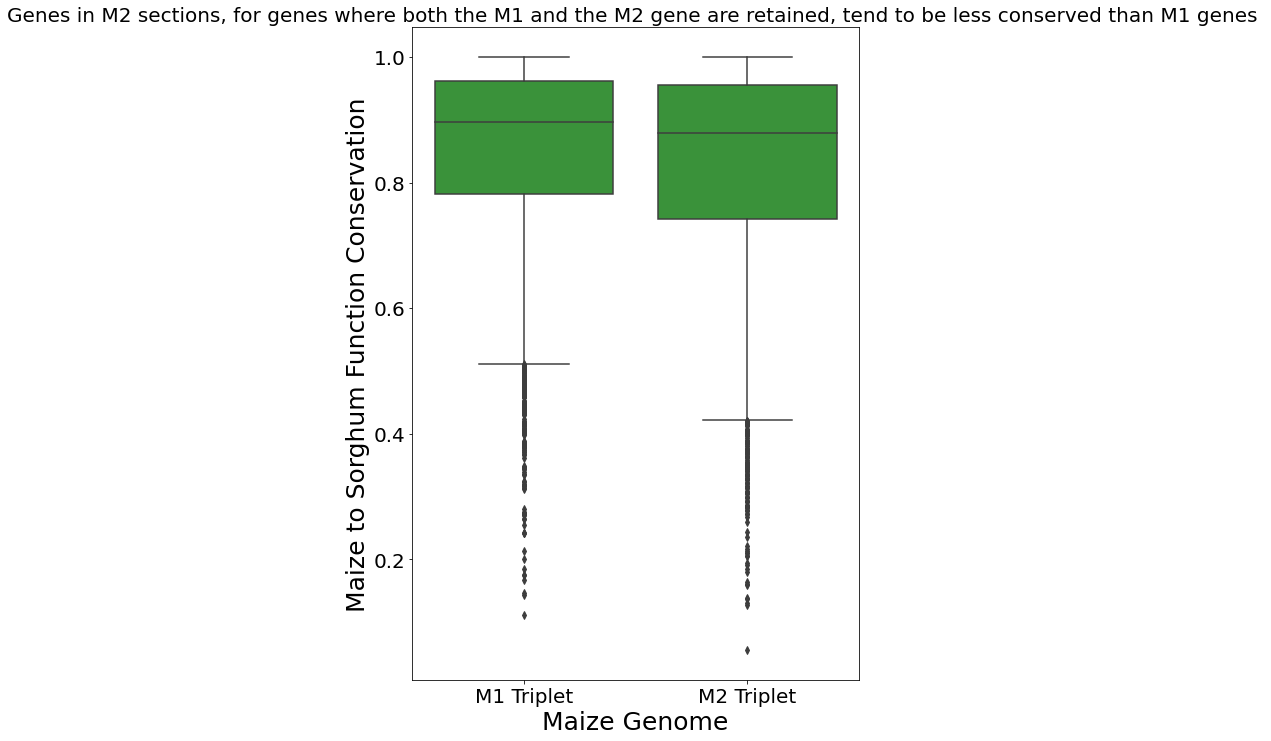

In [42]:
fig, ax = plt.subplots(figsize=(8, 12))
sns.boxplot(
    data=coconet_of_results.loc[
        coconet_of_results["M1_or_M2"].isin(["M1 Triplet", "M2 Triplet"])
    ],
    x="M1_or_M2",
    y="Mean FC Score",
    color="tab:green",
)
plt.ylabel("Maize to Sorghum Function Conservation", fontsize=25)
plt.xlabel("Maize Genome", fontsize=25)
plt.title(
    "Genes in M2 sections, for genes where both the M1 and the M2 gene are retained, tend to be less conserved than M1 genes ",
    fontsize=20,
)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In [43]:
just_m1_results = coconet_of_results.loc[coconet_of_results["M1_or_M2"] == "M1 Triplet"]
just_m2_results = coconet_of_results.loc[coconet_of_results["M1_or_M2"] == "M2 Triplet"]
just_m1_results.drop(
    columns=[
        "Sorghum_Score_M1",
        "Sorghum_Score_M2",
        "Maize_Score_M1",
        "Maize_Score_M2",
        "M1_or_M2",
        "Duplicate Location",
    ],
    inplace=True,
)
just_m2_results.drop(
    columns=[
        "Sorghum_Score_M1",
        "Sorghum_Score_M2",
        "Maize_Score_M1",
        "Maize_Score_M2",
        "M1_or_M2",
        "Duplicate Location",
    ],
    inplace=True,
)
just_m1_results.rename(
    columns={
        "Mean FC Score": "M1 Mean FC Score",
        "Maize_genome_V4": "Maize_genome_V4 M1",
    },
    inplace=True,
)
just_m2_results.rename(
    columns={
        "Mean FC Score": "M2 Mean FC Score",
        "Maize_genome_V4": "Maize_genome_V4 M2",
    },
    inplace=True,
)

/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/pandas/core/frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/pandas/core/frame.py:4438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [44]:
realigned_triplets_results = just_m1_results.merge(
    right=just_m2_results, how="inner", on="Sorghum"
)
realigned_triplets_results

,Sorghum,Maize_genome_V4 M1,M1 Mean FC Score,Maize_genome_V4 M2,M2 Mean FC Score
0,LOC8055450,Zm00001d001766,0.991096,Zm00001d026665,0.832395
1,LOC8076499,Zm00001d001772,0.722520,Zm00001d026662,0.995444
2,LOC8076496,Zm00001d001774,0.999738,Zm00001d026657,0.987566
3,LOC8076490,Zm00001d001780,0.935979,Zm00001d026653,0.915871
4,LOC110436087,Zm00001d001784,0.847805,Zm00001d026652,0.909955
...,...,...,...,...,...
4235,LOC8070663,Zm00001d053162,0.941559,Zm00001d004857,0.949795
4236,LOC8083087,Zm00001d053173,0.901217,Zm00001d004856,0.922468
4237,LOC8083089,Zm00001d053177,0.888720,Zm00001d004855,0.861817
4238,LOC8070669,Zm00001d053178,0.793873,Zm00001d004851,0.869532


In [45]:
realigned_triplets_results["Difference Between M1 Score and M2 Score"] = (
    realigned_triplets_results["M1 Mean FC Score"]
    - realigned_triplets_results["M2 Mean FC Score"]
)
realigned_triplets_results

,Sorghum,Maize_genome_V4 M1,M1 Mean FC Score,Maize_genome_V4 M2,M2 Mean FC Score,Difference Between M1 Score and M2 Score
0,LOC8055450,Zm00001d001766,0.991096,Zm00001d026665,0.832395,0.158701
1,LOC8076499,Zm00001d001772,0.722520,Zm00001d026662,0.995444,-0.272924
2,LOC8076496,Zm00001d001774,0.999738,Zm00001d026657,0.987566,0.012172
3,LOC8076490,Zm00001d001780,0.935979,Zm00001d026653,0.915871,0.020107
4,LOC110436087,Zm00001d001784,0.847805,Zm00001d026652,0.909955,-0.062151
...,...,...,...,...,...,...
4235,LOC8070663,Zm00001d053162,0.941559,Zm00001d004857,0.949795,-0.008236
4236,LOC8083087,Zm00001d053173,0.901217,Zm00001d004856,0.922468,-0.021251
4237,LOC8083089,Zm00001d053177,0.888720,Zm00001d004855,0.861817,0.026903
4238,LOC8070669,Zm00001d053178,0.793873,Zm00001d004851,0.869532,-0.075659


In [46]:
realigned_triplets_results.mean()

M1 Mean FC Score                            0.849955
M2 Mean FC Score                            0.828428
Difference Between M1 Score and M2 Score    0.021527
dtype: float64

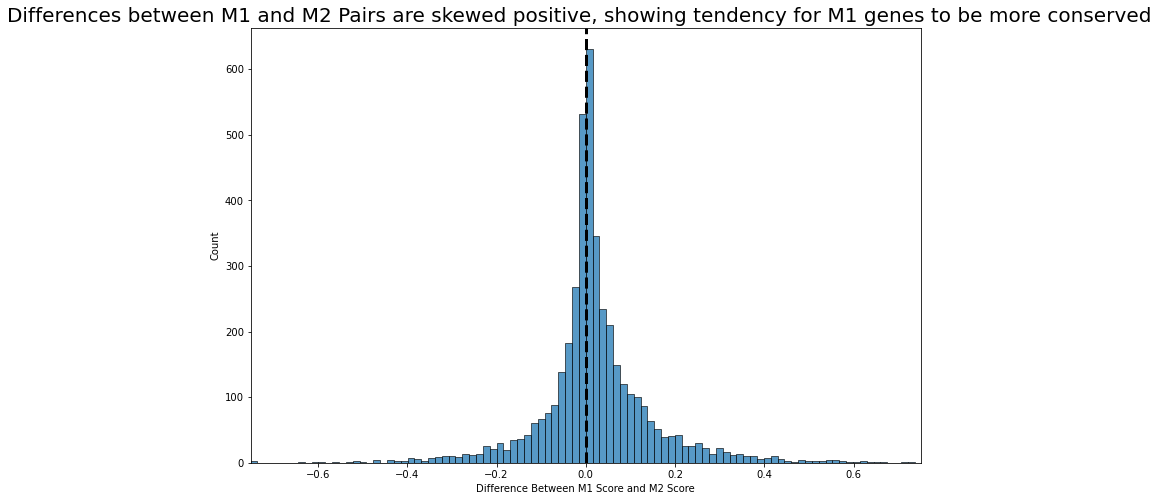

In [47]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.histplot(
    data=realigned_triplets_results,
    x="Difference Between M1 Score and M2 Score",
    bins=100,
)
plt.title(
    "Differences between M1 and M2 Pairs are skewed positive, showing tendency for M1 genes to be more conserved  ",
    fontsize=20,
)
plt.axvline(0, color="k", linestyle="dashed", linewidth=3)
plt.xlim((-0.75, 0.75))
plt.show()

<AxesSubplot:xlabel='Mean FC Score', ylabel='Probability'>

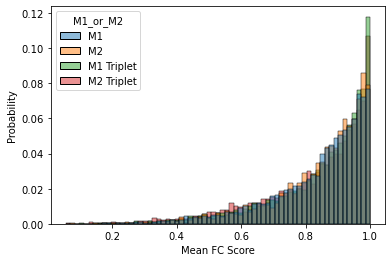

In [48]:
sns.histplot(
    data=coconet_of_results,
    x="Mean FC Score",
    hue="M1_or_M2",
    stat="probability",
    common_norm=False,
)
# plt.title("Overall Genome doesn't show differences in conservation between M1 and M2 genomes, but individual gene patterns may be different", fontsize = 12)

In [49]:
original_triplets = pd.read_csv(
    "/data/passala/Collaborator_Data/Bruno_Ken_Collab/Orthologous_Genes_Sorgum_M1_M2_Set.csv"
)

In [50]:
triplet_identifier = original_triplets.loc[original_triplets["Species"].isin(["M1"])]
triplet_identifier.drop(columns=["Species"], inplace=True)
triplet_identifier.head(-5)

/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/pandas/core/frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Triplet,Genes
5052,1,Zm00001d001766
5053,2,Zm00001d001772
5054,3,Zm00001d001774
5055,4,Zm00001d001780
5056,5,Zm00001d001784
...,...,...
10094,5043,Zm00001d053107
10095,5044,Zm00001d053109
10096,5045,Zm00001d053119
10097,5046,Zm00001d053150


In [51]:
realigned_triplets_results

,Sorghum,Maize_genome_V4 M1,M1 Mean FC Score,Maize_genome_V4 M2,M2 Mean FC Score,Difference Between M1 Score and M2 Score
0,LOC8055450,Zm00001d001766,0.991096,Zm00001d026665,0.832395,0.158701
1,LOC8076499,Zm00001d001772,0.722520,Zm00001d026662,0.995444,-0.272924
2,LOC8076496,Zm00001d001774,0.999738,Zm00001d026657,0.987566,0.012172
3,LOC8076490,Zm00001d001780,0.935979,Zm00001d026653,0.915871,0.020107
4,LOC110436087,Zm00001d001784,0.847805,Zm00001d026652,0.909955,-0.062151
...,...,...,...,...,...,...
4235,LOC8070663,Zm00001d053162,0.941559,Zm00001d004857,0.949795,-0.008236
4236,LOC8083087,Zm00001d053173,0.901217,Zm00001d004856,0.922468,-0.021251
4237,LOC8083089,Zm00001d053177,0.888720,Zm00001d004855,0.861817,0.026903
4238,LOC8070669,Zm00001d053178,0.793873,Zm00001d004851,0.869532,-0.075659


In [52]:
triplet_results_with_id = realigned_triplets_results.merge(
    right=triplet_identifier,
    left_on="Maize_genome_V4 M1",
    right_on="Genes",
    how="left",
)
triplet_results_with_id

,Sorghum,Maize_genome_V4 M1,M1 Mean FC Score,Maize_genome_V4 M2,M2 Mean FC Score,Difference Between M1 Score and M2 Score,Triplet,Genes
0,LOC8055450,Zm00001d001766,0.991096,Zm00001d026665,0.832395,0.158701,1,Zm00001d001766
1,LOC8076499,Zm00001d001772,0.722520,Zm00001d026662,0.995444,-0.272924,2,Zm00001d001772
2,LOC8076496,Zm00001d001774,0.999738,Zm00001d026657,0.987566,0.012172,3,Zm00001d001774
3,LOC8076490,Zm00001d001780,0.935979,Zm00001d026653,0.915871,0.020107,4,Zm00001d001780
4,LOC110436087,Zm00001d001784,0.847805,Zm00001d026652,0.909955,-0.062151,5,Zm00001d001784
...,...,...,...,...,...,...,...,...
4809,LOC8070663,Zm00001d053162,0.941559,Zm00001d004857,0.949795,-0.008236,5047,Zm00001d053162
4810,LOC8083087,Zm00001d053173,0.901217,Zm00001d004856,0.922468,-0.021251,5048,Zm00001d053173
4811,LOC8083089,Zm00001d053177,0.888720,Zm00001d004855,0.861817,0.026903,5049,Zm00001d053177
4812,LOC8070669,Zm00001d053178,0.793873,Zm00001d004851,0.869532,-0.075659,5050,Zm00001d053178


In [53]:
triplet_results_with_id = triplet_results_with_id.drop_duplicates(subset="Triplet")

In [54]:
triplet_results_with_id_for_bruno = triplet_results_with_id.drop(
    columns=["Difference Between M1 Score and M2 Score"]
)
triplet_results_with_id_for_bruno.rename(
    columns={"Triplet": "Triplet ID"}, inplace=True
)
triplet_results_with_id_for_bruno.to_csv(
    "/home/passala/Gene_duplication_project/Code/Bruno_maize_sorghum_project/Stuff_to_send_bruno/triplet_with_FC_Score.csv",
    index=False,
)

In [55]:
triplet_results_with_id_for_bruno

,Sorghum,Maize_genome_V4 M1,M1 Mean FC Score,Maize_genome_V4 M2,M2 Mean FC Score,Triplet ID,Genes
0,LOC8055450,Zm00001d001766,0.991096,Zm00001d026665,0.832395,1,Zm00001d001766
1,LOC8076499,Zm00001d001772,0.722520,Zm00001d026662,0.995444,2,Zm00001d001772
2,LOC8076496,Zm00001d001774,0.999738,Zm00001d026657,0.987566,3,Zm00001d001774
3,LOC8076490,Zm00001d001780,0.935979,Zm00001d026653,0.915871,4,Zm00001d001780
4,LOC110436087,Zm00001d001784,0.847805,Zm00001d026652,0.909955,5,Zm00001d001784
...,...,...,...,...,...,...,...
4809,LOC8070663,Zm00001d053162,0.941559,Zm00001d004857,0.949795,5047,Zm00001d053162
4810,LOC8083087,Zm00001d053173,0.901217,Zm00001d004856,0.922468,5048,Zm00001d053173
4811,LOC8083089,Zm00001d053177,0.888720,Zm00001d004855,0.861817,5049,Zm00001d053177
4812,LOC8070669,Zm00001d053178,0.793873,Zm00001d004851,0.869532,5050,Zm00001d053178


In [56]:
def fill_and_cast_to_string(dataframe):
    new_dataframe = dataframe.fillna(value=0)
    new_dataframe = new_dataframe.astype(int)
    new_dataframe = new_dataframe.astype(str)
    return new_dataframe

In [57]:
genes_expressed_in_sorghum_only = pd.read_csv(
    "/data/passala/Collaborator_Data/Bruno_Ken_Collab/SAveragedlistGenes_med_individual_Quart.csv",
    index_col=0,
)
genes_expressed_in_sorghum_only = fill_and_cast_to_string(
    genes_expressed_in_sorghum_only
)


genes_expressed_in_M1_only = pd.read_csv(
    "/data/passala/Collaborator_Data/Bruno_Ken_Collab/M1AveragedlistGenes_med_individual_Quart.csv",
    index_col=0,
)
genes_expressed_in_M1_only = fill_and_cast_to_string(genes_expressed_in_M1_only)

genes_expressed_in_M2_only = pd.read_csv(
    "/data/passala/Collaborator_Data/Bruno_Ken_Collab/M2AveragedlistGenes_med_individual_Quart.csv",
    index_col=0,
)
genes_expressed_in_M2_only = fill_and_cast_to_string(genes_expressed_in_M2_only)
genes_expressed_in_M1_M2 = pd.read_csv(
    "/data/passala/Collaborator_Data/Bruno_Ken_Collab/M1M2AveragedlistGenes_med_individual_Quart.csv",
    index_col=0,
)
genes_expressed_in_M1_M2 = fill_and_cast_to_string(genes_expressed_in_M1_M2)
genes_expressed_in_sorg_M1 = pd.read_csv(
    "/data/passala/Collaborator_Data/Bruno_Ken_Collab/SM1AveragedlistGenes_med_individual_Quart.csv",
    index_col=0,
)
genes_expressed_in_sorg_M1 = fill_and_cast_to_string(genes_expressed_in_sorg_M1)
genes_expressed_in_sorg_M2 = pd.read_csv(
    "/data/passala/Collaborator_Data/Bruno_Ken_Collab/SM2AveragedlistGenes_med_individual_Quart.csv",
    index_col=0,
)
genes_expressed_in_sorg_M2 = fill_and_cast_to_string(genes_expressed_in_sorg_M2)
genes_expressed_in_all = pd.read_csv(
    "/data/passala/Collaborator_Data/Bruno_Ken_Collab/SM1M2AveragedlistGenes_med_individual_Quart.csv",
    index_col=0,
)
genes_expressed_in_all = fill_and_cast_to_string(genes_expressed_in_all)
genes_expressed_in_sorghum_only

,Bad_quality,Columella,Cortex_1,Cortex_2,Cortex_3,Cortex_4,Endodermis,Epidermis_1,Epidermis_2,Epidermis_3,Initials,Pericycle,Stele,Xylem,Young_Stele
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,15,11,1,52,15,17,23,26,1,15,8,1,1
3,11,11,21,15,15,55,21,26,26,52,11,21,15,11,15
4,14,21,26,21,21,58,26,52,30,58,14,52,52,15,26
5,21,23,50,52,23,64,30,58,34,85,21,58,58,21,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,0,0,0,0,0,0,0,0,0,0,0,0,0,5035,0
741,0,0,0,0,0,0,0,0,0,0,0,0,0,5041,0
742,0,0,0,0,0,0,0,0,0,0,0,0,0,5043,0
743,0,0,0,0,0,0,0,0,0,0,0,0,0,5048,0


In [58]:
expression_set_dictionary = {
    "S Only": genes_expressed_in_sorghum_only,
    "M1 Only": genes_expressed_in_M1_only,
    "M2 Only": genes_expressed_in_M2_only,
    "M1 and M2": genes_expressed_in_M1_M2,
    "S and M1": genes_expressed_in_sorg_M1,
    "S and M2": genes_expressed_in_sorg_M2,
    "S, M1, M2": genes_expressed_in_all,
}

In [59]:
triplet_expression_location = pd.DataFrame(
    data=np.nan,
    index=triplet_results_with_id["Triplet"],
    columns=genes_expressed_in_all.columns,
)
triplet_expression_location

,Bad_quality,Columella,Cortex_1,Cortex_2,Cortex_3,Cortex_4,Endodermis,Epidermis_1,Epidermis_2,Epidermis_3,Initials,Pericycle,Stele,Xylem,Young_Stele
Triplet,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
for triplet_id in triplet_expression_location.index:
    for possible_expression_combination in expression_set_dictionary.keys():
        current_dictionary_to_check = expression_set_dictionary[
            possible_expression_combination
        ]
        for cell_type in triplet_expression_location.columns:
            if str(triplet_id) in current_dictionary_to_check[cell_type].to_list():
                triplet_expression_location.loc[
                    triplet_id, cell_type
                ] = possible_expression_combination

triplet_expression_location

,Bad_quality,Columella,Cortex_1,Cortex_2,Cortex_3,Cortex_4,Endodermis,Epidermis_1,Epidermis_2,Epidermis_3,Initials,Pericycle,Stele,Xylem,Young_Stele
Triplet,,,,,,,,,,,,,,,
1,S Only,S Only,S and M2,"S, M1, M2",S Only,"S, M1, M2","S, M1, M2","S, M1, M2",S and M2,"S, M1, M2",S Only,S and M1,S and M1,S Only,S Only
2,M2 Only,M2 Only,M2 Only,M2 Only,M2 Only,S and M2,M2 Only,M2 Only,M2 Only,M2 Only,M2 Only,M2 Only,M2 Only,M2 Only,M2 Only
3,NaN,M2 Only,M1 and M2,M1 and M2,M1 and M2,"S, M1, M2",M1 Only,M1 and M2,M1 and M2,M1 and M2,M2 Only,M1 and M2,M1 and M2,M1 and M2,M1 and M2
4,"S, M1, M2",S and M1,"S, M1, M2","S, M1, M2","S, M1, M2","S, M1, M2",S and M1,S and M1,S and M1,S and M1,"S, M1, M2","S, M1, M2","S, M1, M2",S and M1,S and M1
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5047,S and M2,S and M2,"S, M1, M2","S, M1, M2","S, M1, M2","S, M1, M2","S, M1, M2",S and M2,S and M2,"S, M1, M2",M2 Only,"S, M1, M2","S, M1, M2","S, M1, M2","S, M1, M2"
5048,S Only,S Only,S Only,NaN,S Only,NaN,S Only,NaN,S Only,S Only,S Only,NaN,S Only,S Only,NaN
5049,"S, M1, M2","S, M1, M2","S, M1, M2","S, M1, M2","S, M1, M2","S, M1, M2","S, M1, M2","S, M1, M2","S, M1, M2","S, M1, M2","S, M1, M2","S, M1, M2","S, M1, M2","S, M1, M2","S, M1, M2"


In [61]:
triplet_expression_location.to_csv(
    "/home/passala/Gene_duplication_project/Code/Bruno_maize_sorghum_project/Stuff_to_send_bruno/triplet_gene_expression_location.csv"
)

In [62]:
triplet_results_with_id[
    "Mean Functional Conservation for Triplet Pair"
] = triplet_results_with_id[["M1 Mean FC Score", "M2 Mean FC Score"]].mean(axis=1)
triplet_results_with_id

/tmp/ipykernel_2091521/848688606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  triplet_results_with_id[


,Sorghum,Maize_genome_V4 M1,M1 Mean FC Score,Maize_genome_V4 M2,M2 Mean FC Score,Difference Between M1 Score and M2 Score,Triplet,Genes,Mean Functional Conservation for Triplet Pair
0,LOC8055450,Zm00001d001766,0.991096,Zm00001d026665,0.832395,0.158701,1,Zm00001d001766,0.911745
1,LOC8076499,Zm00001d001772,0.722520,Zm00001d026662,0.995444,-0.272924,2,Zm00001d001772,0.858982
2,LOC8076496,Zm00001d001774,0.999738,Zm00001d026657,0.987566,0.012172,3,Zm00001d001774,0.993652
3,LOC8076490,Zm00001d001780,0.935979,Zm00001d026653,0.915871,0.020107,4,Zm00001d001780,0.925925
4,LOC110436087,Zm00001d001784,0.847805,Zm00001d026652,0.909955,-0.062151,5,Zm00001d001784,0.878880
...,...,...,...,...,...,...,...,...,...
4809,LOC8070663,Zm00001d053162,0.941559,Zm00001d004857,0.949795,-0.008236,5047,Zm00001d053162,0.945677
4810,LOC8083087,Zm00001d053173,0.901217,Zm00001d004856,0.922468,-0.021251,5048,Zm00001d053173,0.911842
4811,LOC8083089,Zm00001d053177,0.888720,Zm00001d004855,0.861817,0.026903,5049,Zm00001d053177,0.875268
4812,LOC8070669,Zm00001d053178,0.793873,Zm00001d004851,0.869532,-0.075659,5050,Zm00001d053178,0.831702


In [63]:
## For genes expressed in M1/M1/M1M2 or Sorghum, do they have lower functional conservation
tidy_table_comparing_expressed_in_both_species_vs_expressed_in_just_1 = pd.DataFrame(
    columns=[
        "Triplet",
        "Mean Functional Conservation",
        "Species Expressed In",
        "Cell Type",
    ]
)
tidy_table_comparing_expressed_in_both_species_vs_expressed_in_just_1

,Triplet,Mean Functional Conservation,Species Expressed In,Cell Type


In [64]:
for triplet_row_id, triplet_row_data in triplet_expression_location.iterrows():
    current_functional_conservation = (
        triplet_results_with_id["Mean Functional Conservation for Triplet Pair"]
        .loc[triplet_results_with_id["Triplet"] == triplet_row_id]
        .item()
    )
    for cell_type in triplet_row_data.index:
        species_identifier = triplet_row_data[cell_type]
        if species_identifier in ["S Only"]:
            species_identifier = "Sorghum"
        if species_identifier in ["M1 Only", "M2 Only", "M1 and M2"]:
            species_identifier = "Maize"
        if species_identifier in ["S and M1", "S and M2", "S, M1, M2"]:
            species_identifier = "Both Species"
        if type(species_identifier) != str:
            continue
        to_append = [
            triplet_row_id,
            current_functional_conservation,
            species_identifier,
            cell_type,
        ]
        a_series = pd.Series(
            to_append,
            index=tidy_table_comparing_expressed_in_both_species_vs_expressed_in_just_1.columns,
        )
        tidy_table_comparing_expressed_in_both_species_vs_expressed_in_just_1 = tidy_table_comparing_expressed_in_both_species_vs_expressed_in_just_1.append(
            a_series, ignore_index=True
        )

In [65]:
tidy_table_comparing_expressed_in_both_species_vs_expressed_in_just_1

,Triplet,Mean Functional Conservation,Species Expressed In,Cell Type
0,1,0.911745,Sorghum,Bad_quality
1,1,0.911745,Sorghum,Columella
2,1,0.911745,Both Species,Cortex_1
3,1,0.911745,Both Species,Cortex_2
4,1,0.911745,Sorghum,Cortex_3
...,...,...,...,...
52639,5051,0.904789,Sorghum,Initials
52640,5051,0.904789,Both Species,Pericycle
52641,5051,0.904789,Both Species,Stele
52642,5051,0.904789,Sorghum,Xylem


In [77]:
tidy_table_comparing_expressed_in_both_species_vs_expressed_in_just_1.to_csv(
    "/home/passala/Gene_duplication_project/Code/Bruno_maize_sorghum_project/Minor_Tables/coco_net_expression_data_for_figure.csv",
    index=False,
)

(array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

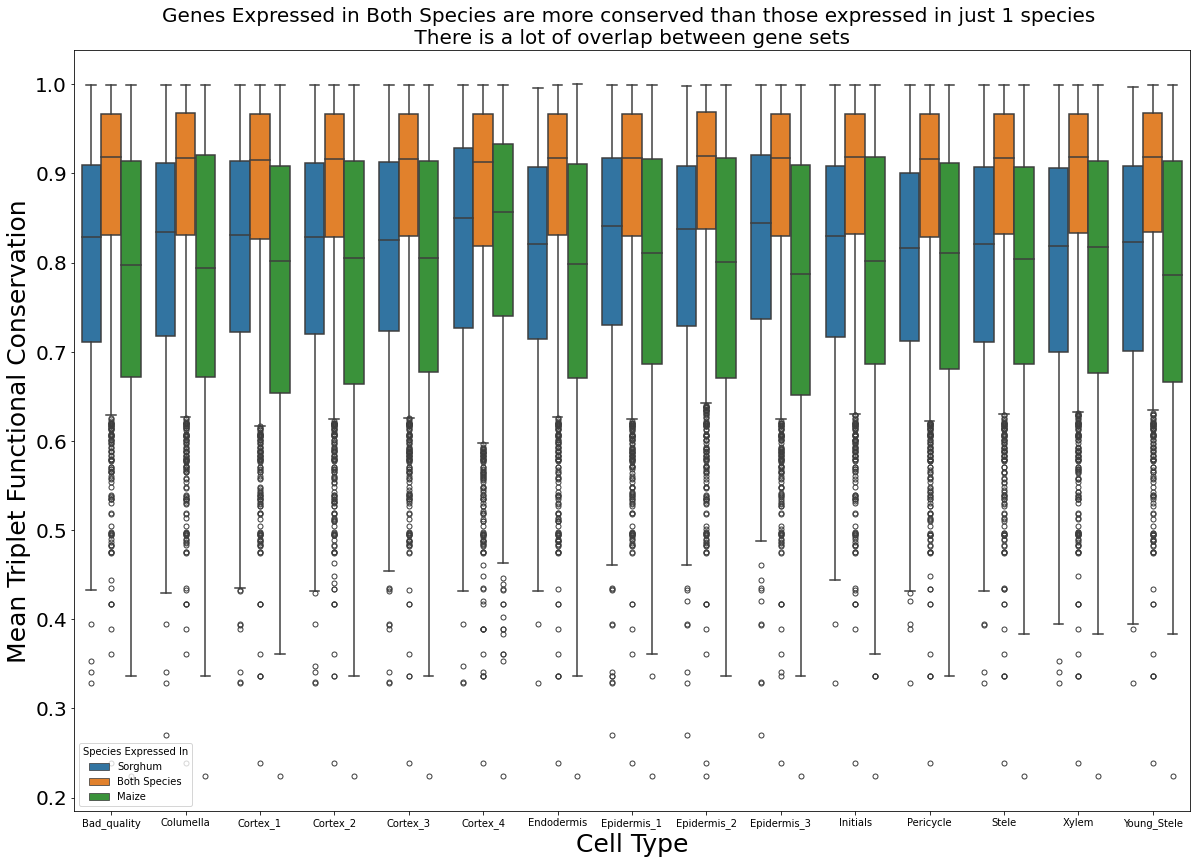

In [66]:
flierprops = dict(marker="o", markerfacecolor="none", markersize=5, linestyle="none")
fig, ax = plt.subplots(figsize=(20, 14))
sns.boxplot(
    x="Cell Type",
    y="Mean Functional Conservation",
    hue="Species Expressed In",
    data=tidy_table_comparing_expressed_in_both_species_vs_expressed_in_just_1,
    flierprops=flierprops,
)

plt.ylabel("Mean Triplet Functional Conservation", fontsize=25)
plt.xlabel("Cell Type", fontsize=25)
plt.title(
    "Genes Expressed in Both Species are more conserved than those expressed in just 1 species \n There is a lot of overlap between gene sets ",
    fontsize=20,
)
plt.xticks(fontsize=10)
plt.yticks(fontsize=20) 

In [67]:
tidy_table_comparing_expressed_in_M1_and_Sorg_to_expressed_in_M2 = pd.DataFrame(
    columns=[
        "Triplet",
        "Functional Conservation",
        "Conservation Score Between Genome and Sorghum",
        "Cell Type",
    ]
)
tidy_table_comparing_expressed_in_M1_and_Sorg_to_expressed_in_M2

,Triplet,Functional Conservation,Conservation Score Between Genome and Sorghum,Cell Type


In [68]:
triplet_results_with_id

,Sorghum,Maize_genome_V4 M1,M1 Mean FC Score,Maize_genome_V4 M2,M2 Mean FC Score,Difference Between M1 Score and M2 Score,Triplet,Genes,Mean Functional Conservation for Triplet Pair
0,LOC8055450,Zm00001d001766,0.991096,Zm00001d026665,0.832395,0.158701,1,Zm00001d001766,0.911745
1,LOC8076499,Zm00001d001772,0.722520,Zm00001d026662,0.995444,-0.272924,2,Zm00001d001772,0.858982
2,LOC8076496,Zm00001d001774,0.999738,Zm00001d026657,0.987566,0.012172,3,Zm00001d001774,0.993652
3,LOC8076490,Zm00001d001780,0.935979,Zm00001d026653,0.915871,0.020107,4,Zm00001d001780,0.925925
4,LOC110436087,Zm00001d001784,0.847805,Zm00001d026652,0.909955,-0.062151,5,Zm00001d001784,0.878880
...,...,...,...,...,...,...,...,...,...
4809,LOC8070663,Zm00001d053162,0.941559,Zm00001d004857,0.949795,-0.008236,5047,Zm00001d053162,0.945677
4810,LOC8083087,Zm00001d053173,0.901217,Zm00001d004856,0.922468,-0.021251,5048,Zm00001d053173,0.911842
4811,LOC8083089,Zm00001d053177,0.888720,Zm00001d004855,0.861817,0.026903,5049,Zm00001d053177,0.875268
4812,LOC8070669,Zm00001d053178,0.793873,Zm00001d004851,0.869532,-0.075659,5050,Zm00001d053178,0.831702


In [69]:
for triplet_row_id, triplet_row_data in triplet_expression_location.iterrows():
    m1_conservation = (
        triplet_results_with_id["M1 Mean FC Score"]
        .loc[triplet_results_with_id["Triplet"] == triplet_row_id]
        .item()
    )
    m2_conservation = (
        triplet_results_with_id["M2 Mean FC Score"]
        .loc[triplet_results_with_id["Triplet"] == triplet_row_id]
        .item()
    )
    for cell_type in triplet_row_data.index:
        genome_pair = triplet_row_data[cell_type]
        if genome_pair in ["S and M1"]:
            genome_pair = "M1 and Sorghum"
            to_append = [triplet_row_id, m1_conservation, genome_pair, cell_type]
            a_series = pd.Series(
                to_append,
                index=tidy_table_comparing_expressed_in_M1_and_Sorg_to_expressed_in_M2.columns,
            )
            tidy_table_comparing_expressed_in_M1_and_Sorg_to_expressed_in_M2 = (
                tidy_table_comparing_expressed_in_M1_and_Sorg_to_expressed_in_M2.append(
                    a_series, ignore_index=True
                )
            )
            genome_pair = "M2 and Sorghum"
            to_append = [triplet_row_id, m2_conservation, genome_pair, cell_type]
            a_series = pd.Series(
                to_append,
                index=tidy_table_comparing_expressed_in_M1_and_Sorg_to_expressed_in_M2.columns,
            )
            tidy_table_comparing_expressed_in_M1_and_Sorg_to_expressed_in_M2 = (
                tidy_table_comparing_expressed_in_M1_and_Sorg_to_expressed_in_M2.append(
                    a_series, ignore_index=True
                )
            )

In [70]:
tidy_table_comparing_expressed_in_M1_and_Sorg_to_expressed_in_M2

,Triplet,Functional Conservation,Conservation Score Between Genome and Sorghum,Cell Type
0,1,0.991096,M1 and Sorghum,Pericycle
1,1,0.832395,M2 and Sorghum,Pericycle
2,1,0.991096,M1 and Sorghum,Stele
3,1,0.832395,M2 and Sorghum,Stele
4,4,0.935979,M1 and Sorghum,Columella
...,...,...,...,...
13623,5046,0.853643,M2 and Sorghum,Initials
13624,5046,0.920806,M1 and Sorghum,Xylem
13625,5046,0.853643,M2 and Sorghum,Xylem
13626,5046,0.920806,M1 and Sorghum,Young_Stele


In [71]:
tidy_table_comparing_expressed_in_M1_and_Sorg_to_expressed_in_M2.loc[
    tidy_table_comparing_expressed_in_M1_and_Sorg_to_expressed_in_M2[
        "Conservation Score Between Genome and Sorghum"
    ]
    == "M1 and Sorghum"
]["Cell Type"].value_counts()

Cortex_3       495
Pericycle      480
Cortex_1       479
Endodermis     473
Cortex_2       466
Columella      458
Epidermis_1    457
Epidermis_3    455
Cortex_4       448
Xylem          446
Stele          446
Young_Stele    443
Epidermis_2    441
Initials       417
Bad_quality    410
Name: Cell Type, dtype: int64

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

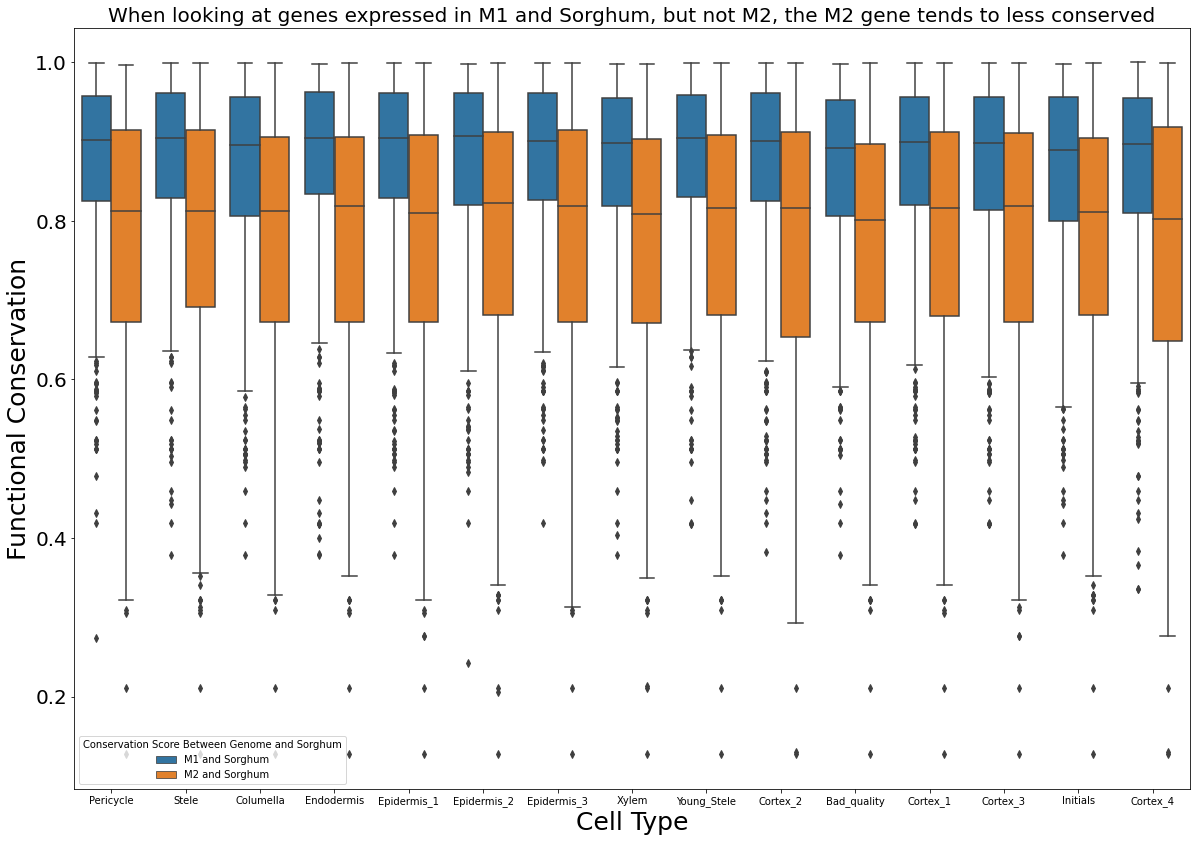

In [72]:
fig, ax = plt.subplots(figsize=(20, 14))
sns.boxplot(
    x="Cell Type",
    y="Functional Conservation",
    hue="Conservation Score Between Genome and Sorghum",
    data=tidy_table_comparing_expressed_in_M1_and_Sorg_to_expressed_in_M2,
)
plt.ylabel("Functional Conservation", fontsize=25)
plt.xlabel("Cell Type", fontsize=25)
plt.title(
    "When looking at genes expressed in M1 and Sorghum, but not M2, the M2 gene tends to less conserved",
    fontsize=20,
)
plt.xticks(fontsize=10)
plt.yticks(fontsize=20)

In [73]:
tidy_reversed = pd.DataFrame(
    columns=[
        "Triplet",
        "Functional Conservation",
        "Conservation Score Between Genome and Sorghum",
        "Cell Type",
    ]
)
tidy_reversed

,Triplet,Functional Conservation,Conservation Score Between Genome and Sorghum,Cell Type


In [74]:
for triplet_row_id, triplet_row_data in triplet_expression_location.iterrows():
    m1_conservation = (
        triplet_results_with_id["M1 Mean FC Score"]
        .loc[triplet_results_with_id["Triplet"] == triplet_row_id]
        .item()
    )
    m2_conservation = (
        triplet_results_with_id["M2 Mean FC Score"]
        .loc[triplet_results_with_id["Triplet"] == triplet_row_id]
        .item()
    )
    for cell_type in triplet_row_data.index:
        genome_pair = triplet_row_data[cell_type]
        if genome_pair in ["S and M2"]:
            genome_pair = "M1 and Sorghum"
            to_append = [triplet_row_id, m1_conservation, genome_pair, cell_type]
            a_series = pd.Series(
                to_append,
                index=tidy_reversed.columns,
            )
            tidy_reversed = tidy_reversed.append(a_series, ignore_index=True)
            genome_pair = "M2 and Sorghum"
            to_append = [triplet_row_id, m2_conservation, genome_pair, cell_type]
            a_series = pd.Series(
                to_append,
                index=tidy_reversed.columns,
            )
            tidy_reversed = tidy_reversed.append(a_series, ignore_index=True)

In [75]:
tidy_reversed

,Triplet,Functional Conservation,Conservation Score Between Genome and Sorghum,Cell Type
0,1,0.991096,M1 and Sorghum,Cortex_1
1,1,0.832395,M2 and Sorghum,Cortex_1
2,1,0.991096,M1 and Sorghum,Epidermis_2
3,1,0.832395,M2 and Sorghum,Epidermis_2
4,2,0.722520,M1 and Sorghum,Cortex_4
...,...,...,...,...
13569,5051,0.854291,M2 and Sorghum,Epidermis_1
13570,5051,0.955287,M1 and Sorghum,Epidermis_3
13571,5051,0.854291,M2 and Sorghum,Epidermis_3
13572,5051,0.955287,M1 and Sorghum,Stele


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

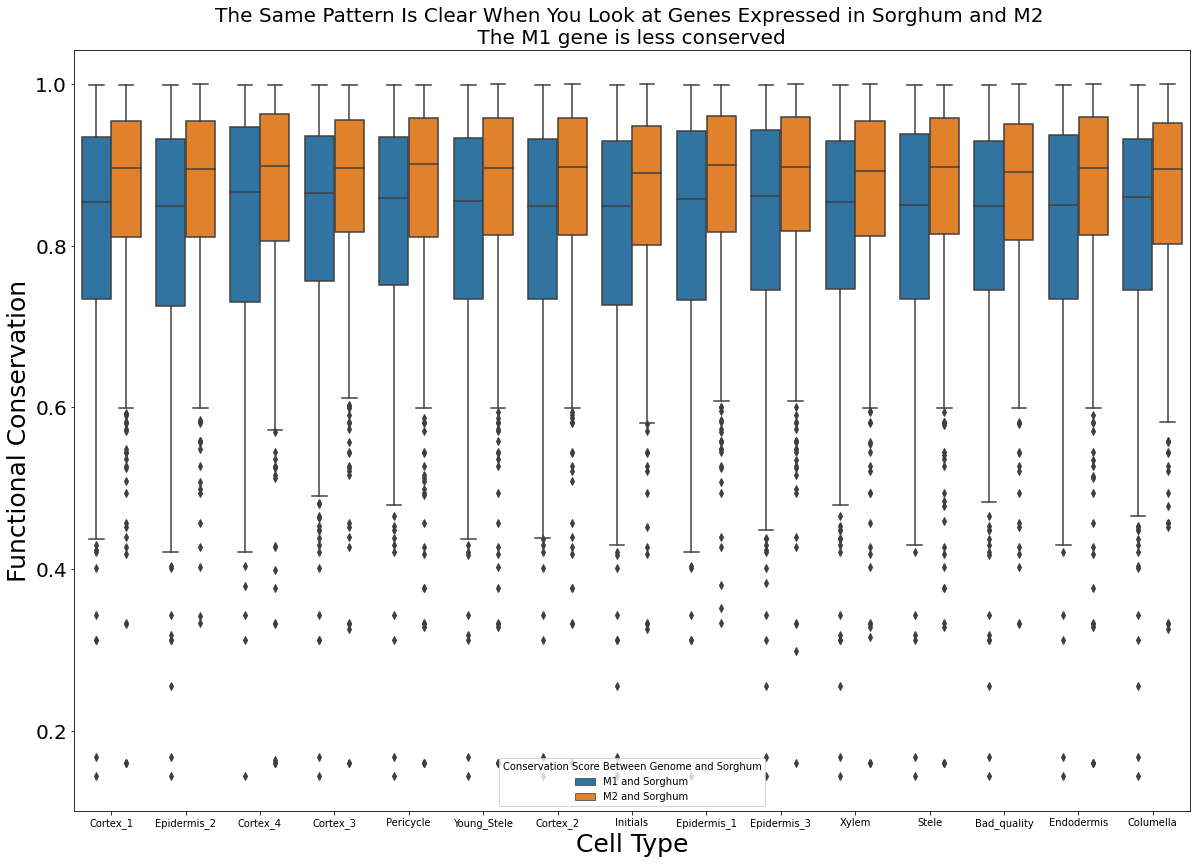

In [76]:
fig, ax = plt.subplots(figsize=(20, 14))
sns.boxplot(
    x="Cell Type",
    y="Functional Conservation",
    hue="Conservation Score Between Genome and Sorghum",
    data=tidy_reversed,
)
plt.ylabel("Functional Conservation", fontsize=25)
plt.xlabel("Cell Type", fontsize=25)
plt.title(
    "The Same Pattern Is Clear When You Look at Genes Expressed in Sorghum and M2 \n The M1 gene is less conserved ",
    fontsize=20,
)
plt.xticks(fontsize=10)
plt.yticks(fontsize=20)